<a href="https://colab.research.google.com/github/prajvalsudhir/Facemask-Detection/blob/master/facemask_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from matplotlib.image import imread
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
pwd

'/content'

In [0]:
data = '/content/gdrive/My Drive/Colab Notebooks/data'

In [0]:
os.listdir('/content/gdrive/My Drive/Colab Notebooks/data')

['test', 'train']

In [0]:
#lets split the data to train and test
#there are approx 680 images in withmask and withoutmask each 

In [0]:
#80% for train and 20% for test

In [0]:
(0.8*680)*2

1088.0

In [0]:
(0.2*680)*2

272.0

In [0]:
os.listdir('/content/gdrive/My Drive/Colab Notebooks/data/train')

['without_mask', 'with_mask']

In [0]:
train_path = '/content/gdrive/My Drive/Colab Notebooks/data/train'
test_path = '/content/gdrive/My Drive/Colab Notebooks/data/test'

In [0]:
os.listdir(train_path+'/without_mask')

['105.jpg',
 '1.jpg',
 '110.jpg',
 '0.jpg',
 '10.jpg',
 '104.jpg',
 '102.jpg',
 '101.jpg',
 '107.jpg',
 '108.jpg',
 '111.jpg',
 '106.jpg',
 '11.jpg',
 '100.jpg',
 '109.jpg',
 '133.jpg',
 '184.jpg',
 '224.jpg',
 '168.jpg',
 '117.jpg',
 '215.jpg',
 '14.jpg',
 '194.jpg',
 '164.jpg',
 '174.jpg',
 '213.jpg',
 '152.jpg',
 '140.jpg',
 '22.jpg',
 '197.jpg',
 '17.jpg',
 '125.jpg',
 '153.jpg',
 '18.jpg',
 '143.jpg',
 '206.jpg',
 '115.jpg',
 '195.jpg',
 '178.jpg',
 '172.jpg',
 '163.jpg',
 '218.jpg',
 '2.jpg',
 '176.jpg',
 '173.jpg',
 '13.jpg',
 '135.jpg',
 '120.jpg',
 '151.jpg',
 '203.jpg',
 '131.jpg',
 '179.jpg',
 '160.jpg',
 '141.jpg',
 '207.jpg',
 '119.jpg',
 '149.jpg',
 '226.jpg',
 '186.jpg',
 '217.jpg',
 '139.jpg',
 '145.jpg',
 '188.jpg',
 '161.jpg',
 '136.jpg',
 '148.jpg',
 '118.jpg',
 '208.jpg',
 '20.jpg',
 '225.jpg',
 '192.jpg',
 '216.jpg',
 '114.jpg',
 '169.jpg',
 '123.jpg',
 '228.jpg',
 '170.jpg',
 '15.jpg',
 '132.jpg',
 '214.jpg',
 '127.jpg',
 '180.jpg',
 '185.jpg',
 '177.jpg',
 '222.j

In [0]:
len(os.listdir(train_path+'/without_mask'))

545

In [0]:
cv2.imread(train_path+'/without_mask/0.jpg')

array([[[ 18,   3,   7],
        [ 18,   3,   7],
        [ 18,   3,   7],
        ...,
        [ 28,  12,  19],
        [ 28,  12,  19],
        [ 29,  13,  20]],

       [[ 22,   7,  11],
        [ 22,   7,  11],
        [ 22,   7,  11],
        ...,
        [ 41,  25,  32],
        [ 41,  25,  32],
        [ 42,  26,  33]],

       [[ 26,   9,  13],
        [ 26,   9,  13],
        [ 26,   9,  13],
        ...,
        [ 30,  15,  19],
        [ 31,  16,  20],
        [ 32,  17,  21]],

       ...,

       [[ 77,   5, 172],
        [ 73,   5, 170],
        [ 65,   5, 167],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 73,   5, 166],
        [ 67,   3, 162],
        [ 62,   5, 158],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 71,   6, 162],
        [ 65,   3, 157],
        [ 59,   4, 155],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [0]:
imread(train_path+'/without_mask/0.jpg')

array([[[  7,   3,  18],
        [  7,   3,  18],
        [  7,   3,  18],
        ...,
        [ 19,  12,  28],
        [ 19,  12,  28],
        [ 20,  13,  29]],

       [[ 11,   7,  22],
        [ 11,   7,  22],
        [ 11,   7,  22],
        ...,
        [ 30,  26,  41],
        [ 30,  26,  41],
        [ 31,  27,  42]],

       [[ 13,   9,  26],
        [ 13,   9,  26],
        [ 13,   9,  26],
        ...,
        [ 19,  15,  30],
        [ 20,  16,  31],
        [ 21,  17,  32]],

       ...,

       [[171,   5,  77],
        [170,   5,  73],
        [168,   4,  67],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[165,   6,  73],
        [162,   3,  67],
        [159,   4,  62],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[160,   7,  71],
        [156,   4,  63],
        [153,   4,  59],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

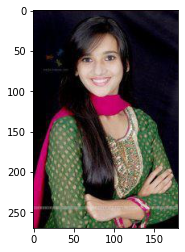

In [0]:
plt.imshow(imread(train_path+'/without_mask/0.jpg'))

In [0]:
sam = imread(train_path+'/without_mask/0.jpg')
sam.shape

(270, 180, 3)

In [0]:
imread(train_path+'/without_mask/2.jpg').shape

(433, 320, 3)

In [0]:
#all the images have varying shape so lets find the avg height and width

In [0]:
avg_height= []
avg_width = []
for face in os.listdir(train_path+'/without_mask'):
    f_img = imread(train_path+'/without_mask/'+face)
    f_wid,f_hig,cc = f_img.shape
    avg_width.append(f_wid)
    avg_height.append(f_hig)

In [0]:
avg_width

[244,
 225,
 960,
 270,
 366,
 341,
 433,
 428,
 433,
 428,
 428,
 484,
 224,
 428,
 374,
 428,
 465,
 433,
 240,
 428,
 428,
 274,
 433,
 262,
 414,
 456,
 246,
 428,
 494,
 428,
 436,
 433,
 259,
 285,
 212,
 428,
 428,
 516,
 428,
 194,
 433,
 433,
 433,
 428,
 233,
 428,
 428,
 428,
 400,
 168,
 417,
 267,
 208,
 256,
 225,
 428,
 428,
 222,
 433,
 433,
 428,
 428,
 194,
 283,
 372,
 428,
 400,
 193,
 428,
 274,
 640,
 428,
 433,
 196,
 428,
 450,
 248,
 428,
 540,
 329,
 265,
 428,
 152,
 170,
 428,
 428,
 227,
 289,
 428,
 351,
 433,
 960,
 428,
 275,
 225,
 433,
 428,
 594,
 428,
 584,
 428,
 433,
 442,
 434,
 418,
 344,
 194,
 650,
 322,
 428,
 249,
 428,
 225,
 960,
 258,
 244,
 428,
 428,
 300,
 590,
 225,
 194,
 250,
 433,
 428,
 433,
 449,
 331,
 428,
 428,
 428,
 178,
 433,
 428,
 433,
 247,
 455,
 224,
 390,
 246,
 433,
 247,
 502,
 266,
 554,
 423,
 275,
 442,
 433,
 251,
 720,
 432,
 480,
 260,
 281,
 382,
 268,
 433,
 428,
 416,
 458,
 433,
 433,
 405,
 428,
 166,
 428

In [0]:
avg_height

[214,
 154,
 594,
 180,
 274,
 324,
 320,
 320,
 320,
 320,
 320,
 428,
 225,
 320,
 296,
 320,
 379,
 320,
 225,
 320,
 320,
 184,
 327,
 192,
 338,
 341,
 205,
 320,
 441,
 320,
 322,
 327,
 195,
 236,
 238,
 320,
 320,
 740,
 320,
 259,
 320,
 327,
 320,
 320,
 203,
 320,
 320,
 320,
 273,
 300,
 340,
 189,
 165,
 197,
 225,
 320,
 320,
 110,
 327,
 327,
 320,
 320,
 259,
 188,
 285,
 320,
 295,
 261,
 320,
 184,
 480,
 320,
 327,
 257,
 320,
 503,
 203,
 320,
 720,
 207,
 190,
 320,
 270,
 296,
 320,
 320,
 222,
 201,
 320,
 312,
 327,
 768,
 320,
 183,
 225,
 320,
 320,
 512,
 320,
 374,
 320,
 320,
 318,
 321,
 300,
 266,
 259,
 797,
 309,
 320,
 202,
 320,
 225,
 956,
 196,
 206,
 320,
 320,
 300,
 513,
 225,
 260,
 226,
 327,
 320,
 320,
 313,
 264,
 320,
 320,
 320,
 150,
 327,
 320,
 320,
 204,
 297,
 225,
 345,
 205,
 320,
 209,
 377,
 189,
 353,
 313,
 183,
 318,
 327,
 205,
 720,
 408,
 480,
 194,
 179,
 341,
 188,
 320,
 320,
 351,
 317,
 320,
 320,
 277,
 320,
 303,
 320

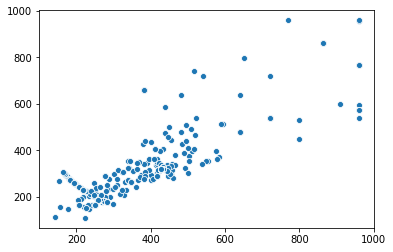

In [0]:
sns.scatterplot(avg_width,avg_height)

In [0]:
np.mean(avg_width)

390.20917431192663

In [0]:
np.mean(avg_height)

320.2862385321101

In [0]:
preprocess_input(sam)

array([[[-0.94509804, -0.9764706 , -0.85882354],
        [-0.94509804, -0.9764706 , -0.85882354],
        [-0.94509804, -0.9764706 , -0.85882354],
        ...,
        [-0.8509804 , -0.90588236, -0.78039217],
        [-0.8509804 , -0.90588236, -0.78039217],
        [-0.84313726, -0.8980392 , -0.77254903]],

       [[-0.9137255 , -0.94509804, -0.827451  ],
        [-0.9137255 , -0.94509804, -0.827451  ],
        [-0.9137255 , -0.94509804, -0.827451  ],
        ...,
        [-0.7647059 , -0.79607844, -0.6784314 ],
        [-0.7647059 , -0.79607844, -0.6784314 ],
        [-0.75686276, -0.7882353 , -0.67058825]],

       [[-0.8980392 , -0.92941177, -0.79607844],
        [-0.8980392 , -0.92941177, -0.79607844],
        [-0.8980392 , -0.92941177, -0.79607844],
        ...,
        [-0.8509804 , -0.88235295, -0.7647059 ],
        [-0.84313726, -0.8745098 , -0.75686276],
        [-0.8352941 , -0.8666667 , -0.7490196 ]],

       ...,

       [[ 0.3411765 , -0.9607843 , -0.3960784 ],
        [ 0

In [0]:
# using image data generator lets generate our training and testing images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

In [0]:
img_gen = ImageDataGenerator(rotation_range=20,#in degrees
    width_shift_range=0.1,#the images will have a max width shift of 10%
    height_shift_range=0.1,
    shear_range=0.1, # max of 10% of the image will be cut
    zoom_range=0.1, # zoom upto 10%
    fill_mode='nearest',# fill up the empty spaces with nearest pixel values
    rescale = 1/255,
    horizontal_flip=True)

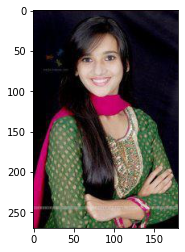

In [0]:
plt.imshow(sam)

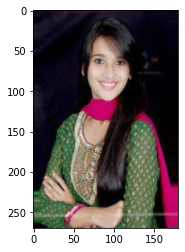

In [0]:
plt.imshow(img_gen.random_transform(sam))

In [0]:
img_gen.flow_from_directory(train_path)

Found 1090 images belonging to 2 classes.


In [0]:
img_gen.flow_from_directory(test_path)

Found 306 images belonging to 2 classes.


In [0]:
train_imgs = img_gen.flow_from_directory(train_path)

Found 1090 images belonging to 2 classes.


In [0]:
train_imgs.class_indices

{'with_mask': 0, 'without_mask': 1}

In [0]:
#the categories have been assigned according to the folder names where 'with_mask': 0, 'without_mask': 1

In [0]:
new_shape = (224,224,3)

In [0]:
train_imgs = img_gen.flow_from_directory(train_path,
                                         target_size=new_shape[0:2],
                                         color_mode='rgb',
                                        batch_size=32,
                                        shuffle=False)

Found 1090 images belonging to 2 classes.


In [0]:
test_imgs = img_gen.flow_from_directory(test_path,
                                         target_size=new_shape[0:2],
                                         color_mode='rgb',
                                        batch_size=32,
                                        shuffle=False)

Found 306 images belonging to 2 classes.


In [0]:
train_imgs[0][0].shape

(32, 224, 224, 3)

In [0]:
train_imgs[0][0]

array([[[[0.23975135, 0.23814438, 0.146705  ],
         [0.24020092, 0.24020092, 0.14411283],
         [0.24225745, 0.24225745, 0.1420563 ],
         ...,
         [0.29357216, 0.37906605, 0.3008698 ],
         [0.22509708, 0.23851192, 0.16391961],
         [0.18127209, 0.20007968, 0.17134866]],

        [[0.24024868, 0.2320947 , 0.15614061],
         [0.24283116, 0.2319848 , 0.1559444 ],
         [0.24180289, 0.23404132, 0.15285961],
         ...,
         [0.27136686, 0.33348677, 0.2564592 ],
         [0.21049513, 0.22443222, 0.1640429 ],
         [0.16724771, 0.19069842, 0.17331761]],

        [[0.22563371, 0.2325682 , 0.15294118],
         [0.22792949, 0.2351745 , 0.15306082],
         [0.23204255, 0.23414624, 0.15408908],
         ...,
         [0.24916159, 0.2879075 , 0.21204865],
         [0.19647072, 0.21274523, 0.167549  ],
         [0.1532233 , 0.18251753, 0.1744863 ]],

        ...,

        [[0.27198982, 0.3229702 , 0.22100943],
         [0.28510407, 0.3331813 , 0.24283317]

In [0]:
preprocess_input(train_imgs[0][0])

array([[[[-0.9983006 , -0.998622  , -0.9987319 ],
         [-0.999076  , -0.9991973 , -0.99901927],
         [-0.9997206 , -0.9997385 , -0.9997462 ],
         ...,
         [-0.9981199 , -0.9980392 , -0.99891186],
         [-0.99813145, -0.9980469 , -0.9989465 ],
         [-0.998143  , -0.99805456, -0.9989812 ]],

        [[-0.9983453 , -0.9986935 , -0.99889725],
         [-0.99894196, -0.9990945 , -0.9989567 ],
         [-0.9996267 , -0.9996581 , -0.9996255 ],
         ...,
         [-0.99808985, -0.99804074, -0.9989942 ],
         [-0.9980783 , -0.99803686, -0.99899036],
         [-0.9980667 , -0.998033  , -0.9989865 ]],

        [[-0.99839   , -0.99876505, -0.9990626 ],
         [-0.99880785, -0.9989917 , -0.99889416],
         [-0.9995329 , -0.99957764, -0.99950486],
         ...,
         [-0.9980623 , -0.99805546, -0.99893713],
         [-0.9980623 , -0.99805933, -0.99892944],
         [-0.99806404, -0.99806404, -0.99892175]],

        ...,

        [[-0.9993541 , -0.9996309 , -0

In [0]:
len(train_imgs)

35

In [0]:
#the data has been reshaped accroding to the new shape and batch size

In [0]:
#importing the mobilenetv2 architecture and building the model on top of that so that its faster to train

In [0]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Input,Dropout
from tensorflow.keras.models import Sequential,Model

In [0]:
base_model = MobileNetV2(weights="imagenet", include_top=False,
                          input_tensor=Input(shape=(224,224,3)))


In [0]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
f_model = base_model.output
f_model = MaxPool2D(pool_size=(7,7))(f_model)
f_model = (Flatten())(f_model)
f_model  = (Dense(128,activation='relu'))(f_model)
f_model  = (Dropout(0.5))(f_model)
f_model  = (Dense(2,activation='softmax'))(f_model)

In [0]:
model = Model(inputs = base_model.input,outputs = f_model)

In [0]:
for layer in base_model.layers:
  layer.trainable = False

In [0]:
base_model.layers

In [0]:
#base_model.trainable = False

In [0]:
base_model.trainable

True

In [0]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [0]:
#the model has been built with the mobilenet model set to not trainable as its preloaded with imagenet weights

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
model.fit(train_imgs,validation_data=test_imgs,epochs=10)

Epoch 1/10
35/35 [==============================] - 24s 678ms/step - loss: 3.2757 - accuracy: 0.6853 - val_loss: 0.7649 - val_accuracy: 0.8954
Epoch 2/10
35/35 [==============================] - 23s 658ms/step - loss: 0.2132 - accuracy: 0.9615 - val_loss: 0.2288 - val_accuracy: 0.9641
Epoch 3/10
35/35 [==============================] - 24s 680ms/step - loss: 0.0650 - accuracy: 0.9835 - val_loss: 0.0380 - val_accuracy: 0.9837
Epoch 4/10
35/35 [==============================] - 23s 668ms/step - loss: 0.0437 - accuracy: 0.9872 - val_loss: 0.0320 - val_accuracy: 0.9869
Epoch 5/10
35/35 [==============================] - 23s 668ms/step - loss: 0.0367 - accuracy: 0.9862 - val_loss: 0.1288 - val_accuracy: 0.9641
Epoch 6/10
35/35 [==============================] - 24s 683ms/step - loss: 0.0419 - accuracy: 0.9881 - val_loss: 0.1029 - val_accuracy: 0.9771
Epoch 7/10
35/35 [==============================] - 23s 666ms/step - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.0316 - val_accuracy: 0.9869

In [0]:
model.save('fmask.h5')

In [0]:
model.history.history

{'accuracy': [0.6853210926055908,
  0.9614678621292114,
  0.9834862351417542,
  0.9871559739112854,
  0.9862385392189026,
  0.9880734086036682,
  0.9908257126808167,
  0.9926605224609375,
  0.9908257126808167,
  0.9926605224609375],
 'loss': [3.2756717205047607,
  0.21317338943481445,
  0.06498347222805023,
  0.0436973012983799,
  0.03669564053416252,
  0.041894011199474335,
  0.02858494408428669,
  0.02016633376479149,
  0.02571774274110794,
  0.02167842909693718],
 'val_accuracy': [0.8954248428344727,
  0.9640522599220276,
  0.983660101890564,
  0.9869281053543091,
  0.9640522599220276,
  0.9771241545677185,
  0.9869281053543091,
  0.9803921580314636,
  0.9738562107086182,
  0.983660101890564],
 'val_loss': [0.7648579478263855,
  0.2288406491279602,
  0.03798434138298035,
  0.031998343765735626,
  0.12882405519485474,
  0.10285135358572006,
  0.03159249201416969,
  0.049097687005996704,
  0.07135795056819916,
  0.05084097385406494]}

In [0]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,3.275672,0.685321,0.764858,0.895425
1,0.213173,0.961468,0.228841,0.964052
2,0.064983,0.983486,0.037984,0.983660
3,0.043697,0.987156,0.031998,0.986928
4,0.036696,0.986239,0.128824,0.964052
5,0.041894,0.988073,0.102851,0.977124
6,0.028585,0.990826,0.031592,0.986928
7,0.020166,0.992661,0.049098,0.980392
8,0.025718,0.990826,0.071358,0.973856
9,0.021678,0.992661,0.050841,0.983660


In [0]:
history = pd.DataFrame(model.history.history)

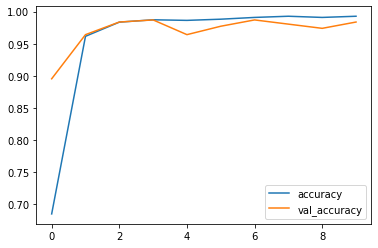

In [0]:
history[['accuracy','val_accuracy']].plot()

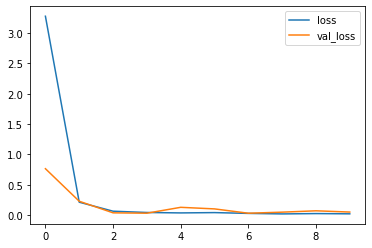

In [0]:
history[['loss','val_loss']].plot()

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
pred = model.predict(test_imgs)

In [0]:
pred

array([[9.89720047e-01, 1.02799479e-02],
       [9.99780476e-01, 2.19547728e-04],
       [9.90091681e-01, 9.90839675e-03],
       [9.95350122e-01, 4.64989664e-03],
       [6.12846971e-01, 3.87153029e-01],
       [9.34379339e-01, 6.56207129e-02],
       [9.99845743e-01, 1.54211841e-04],
       [9.99993205e-01, 6.77936760e-06],
       [5.72095692e-01, 4.27904278e-01],
       [9.99992251e-01, 7.76835168e-06],
       [9.99985337e-01, 1.46673310e-05],
       [9.99997020e-01, 2.98631608e-06],
       [9.99992371e-01, 7.68791688e-06],
       [1.00000000e+00, 2.25419612e-08],
       [9.99999762e-01, 2.19045447e-07],
       [9.99999166e-01, 8.68357745e-07],
       [9.99997258e-01, 2.78486755e-06],
       [1.00000000e+00, 1.08013412e-08],
       [9.98939455e-01, 1.06055255e-03],
       [9.99795377e-01, 2.04634664e-04],
       [1.00000000e+00, 5.72349945e-09],
       [9.99999166e-01, 8.47530714e-07],
       [9.99955416e-01, 4.46180566e-05],
       [9.99982953e-01, 1.70558687e-05],
       [9.909564

In [0]:
test_imgs.class_indices

{'with_mask': 0, 'without_mask': 1}